In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

In [11]:
def generate_model_plot(model, J, num_components, kern_type, ds, band_types, results_dir):
    """
    Generates and saves a boxplot for a given model's squared norm error results.

    This function is generalized to work with different models (e.g., "FMA1", "FAR2")
    by using the model name to construct file paths and plot titles.

    Args:
        model (str): The name of the model (e.g., "FMA1", "FAR2").
        J (int): The 'J' parameter from the simulation filenames.
        num_components (int): The number of components from simulation filenames.
        kern_type (str): The kernel type used (e.g., "Bartlett").
        ds (list): A list of sample sizes (d values) to include in the plot.
        band_types (list): A list of bandwidth type strings (e.g., "3", "fix_2").
        results_dir (str): Path to the directory containing the result CSVs
                           and where the output plot will be saved.
    """
    # --- 1. Setup and Data Loading ---

    # Band type labels for a more descriptive legend in the plot
    band_label_map = {
        "2": r"$\lfloor d^{1/2} \rfloor$",
        "3": r"$\lfloor d^{1/3} \rfloor$",
        "4": r"$\lfloor d^{1/4} \rfloor$",
        "5": r"$\lfloor d^{1/5} \rfloor$",
        "6": r"$\lfloor d^{1/6} \rfloor$",
        "7": r"$\lfloor d^{1/7} \rfloor$",
        "8": r"$\lfloor d^{1/8} \rfloor$",
        "fix_2": r"$2$",
    }

    # Collect all data from the specified CSV files
    data = []
    print(f"Searching for data files for model: {model}...")
    for d in ds:
        for band_type in band_types:
            filename = f"{model}_d{d}_J{J}_numcomp{num_components}_band{band_type}_kernel{kern_type}.csv"
            file_path = os.path.join(results_dir, filename)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                df["d"] = d
                df["band_type"] = band_type
                df["band_label"] = band_label_map.get(band_type, band_type)
                data.append(df)
            else:
                print(f"--> File not found: {file_path}")

    if not data:
        print("\nNo data found. Aborting plot generation.")
        return

    # Combine all loaded data into a single DataFrame
    full_df = pd.concat(data, ignore_index=True)

    # --- 2. Plot Generation ---

    print("\nGenerating plot...")
    sns.set_style("ticks") # Set style to remove the background grid
    plt.figure(figsize=(12, 7))

    # Create the boxplot
    ax = sns.boxplot(
        x="d",
        y="squared_norm",
        hue="band_label",
        data=full_df,
        order=ds,
        hue_order=[band_label_map[b] for b in band_types if b in band_label_map]
    )

    # Set plot titles and labels
    plt.title(f"Squared Norm Error in {model.upper()} ({kern_type} Kernel)", fontsize=16)
    plt.xlabel("Sample size (d)", fontsize=12)
    plt.ylabel("Squared Norm (Riemann Approximation)", fontsize=12)
    plt.ylim(0, 0.5)

    # --- 3. Customize Y-axis Ticks as Requested ---
    ax.yaxis.set_major_locator(mticker.MultipleLocator(0.02))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    plt.tick_params(axis='y', which='major', labelsize=10)
    sns.despine() # Remove the top and right spines

    plt.legend(title="Bandwidth Type", fontsize=10)
    plt.tight_layout()

    # --- 4. Save and Show Plot ---

    plot_filename = f"{model}_boxplot_J{J}_numcomp{num_components}_kernel{kern_type}.png"
    plot_path = os.path.join(results_dir, plot_filename)
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')

    print(f"\nPlot successfully saved to {plot_path}")
    plt.show()


# FMA(1)

Searching for data files for model: FMA1...

Generating plot...

Plot successfully saved to /Users/xinyiwang/Desktop/Desktop - XINYI的MacBook Pro/UCDavis/research_alex/long-run-covariance/codes/results/FMA1_boxplot_J5_numcomp5_kernelBartlett.png


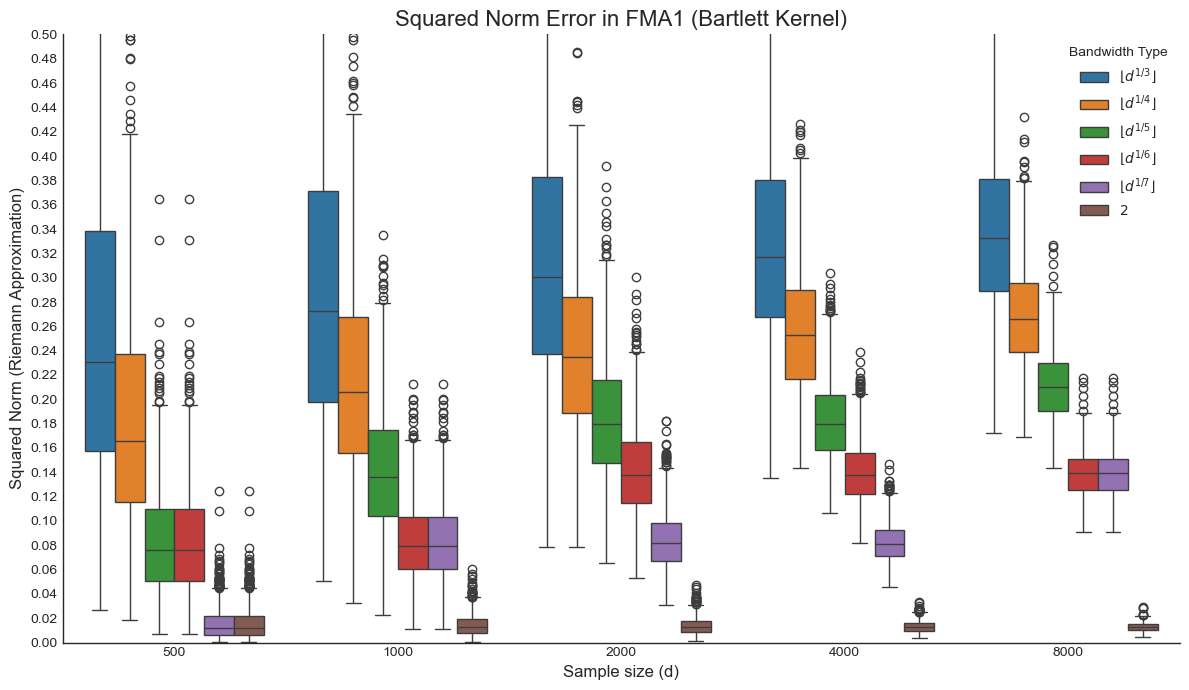

In [12]:
# FMA(1)
# Parameters
model = "FMA1"
J = 5
num_components = 5
kern_type = "Bartlett"
ds = [500, 1000, 2000, 4000, 8000]
band_types = [ "3", "4", "5","6","7","fix_2"]
# Define the directory for results
current_dir = os.getcwd()
results_dir_param = os.path.join(current_dir, "results")
generate_model_plot(
        model=model,
        J=J,
        num_components=num_components,
        kern_type=kern_type,
        ds=ds,
        band_types=band_types,
        results_dir=results_dir_param
    )

# FMA(2)

## Bartlett Kernel

Searching for data files for model: FMA2...

Generating plot...

Plot successfully saved to /Users/xinyiwang/Desktop/Desktop - XINYI的MacBook Pro/UCDavis/research_alex/long-run-covariance/codes/results/FMA2_boxplot_J5_numcomp5_kernelBartlett.png


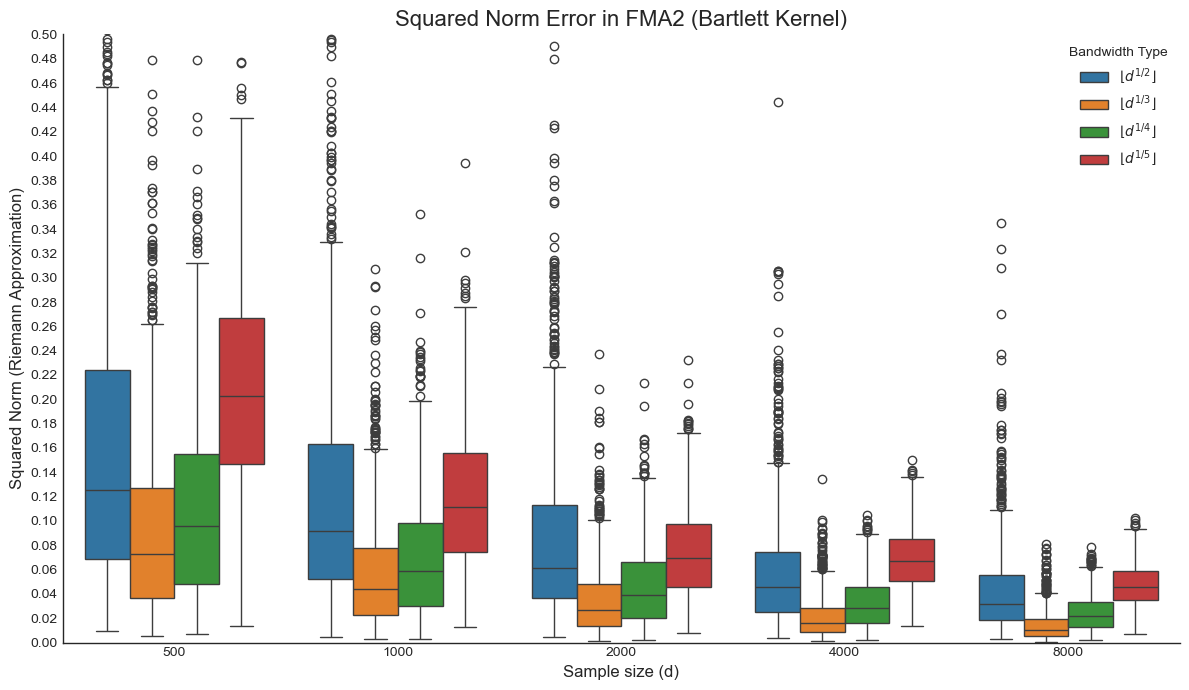

In [ ]:
# FMA(2)Bartlett kernel
# Parameters
model = "FMA2"
J = 5
num_components = 5
kern_type = "Bartlett"
ds = [500, 1000, 2000, 4000, 8000]
band_types = [ "2","3", "4", "5"]
# Define the directory for results
current_dir = os.getcwd()
results_dir_param = os.path.join(current_dir, "results")
generate_model_plot(
        model=model,
        J=J,
        num_components=num_components,
        kern_type=kern_type,
        ds=ds,
        band_types=band_types,
        results_dir=results_dir_param
    )

## Parzen Kernel

Searching for data files for model: FMA2...

Generating plot...

Plot successfully saved to /Users/xinyiwang/Desktop/Desktop - XINYI的MacBook Pro/UCDavis/research_alex/long-run-covariance/codes/results/FMA2_boxplot_J5_numcomp5_kernelParzen.png


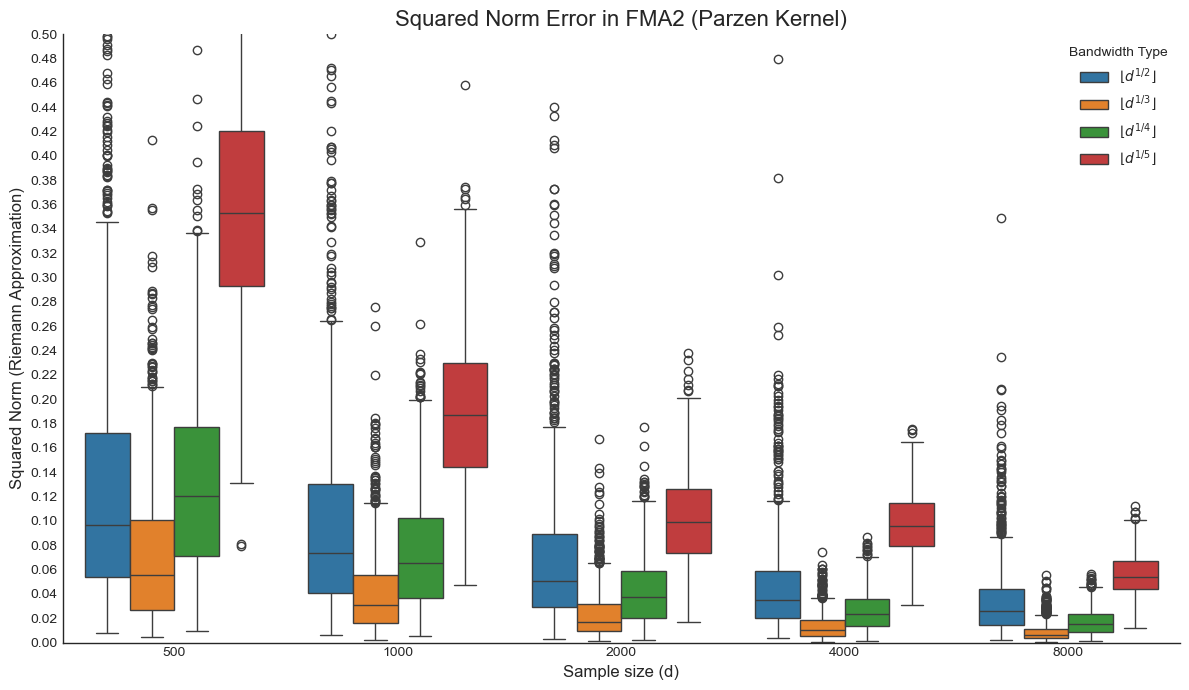

In [16]:
# FMA(2) Parzen kernel
# Parameters
model = "FMA2"
J = 5
num_components = 5
kern_type = "Parzen"
ds = [500, 1000, 2000, 4000, 8000]
band_types = [ "2","3", "4", "5"]
# Define the directory for results
current_dir = os.getcwd()
results_dir_param = os.path.join(current_dir, "results")
generate_model_plot(
        model=model,
        J=J,
        num_components=num_components,
        kern_type=kern_type,
        ds=ds,
        band_types=band_types,
        results_dir=results_dir_param
    )

## Tukey–Hanning

Searching for data files for model: FMA2...

Generating plot...

Plot successfully saved to /Users/xinyiwang/Desktop/Desktop - XINYI的MacBook Pro/UCDavis/research_alex/long-run-covariance/codes/results/FMA2_boxplot_J5_numcomp5_kernelTH.png


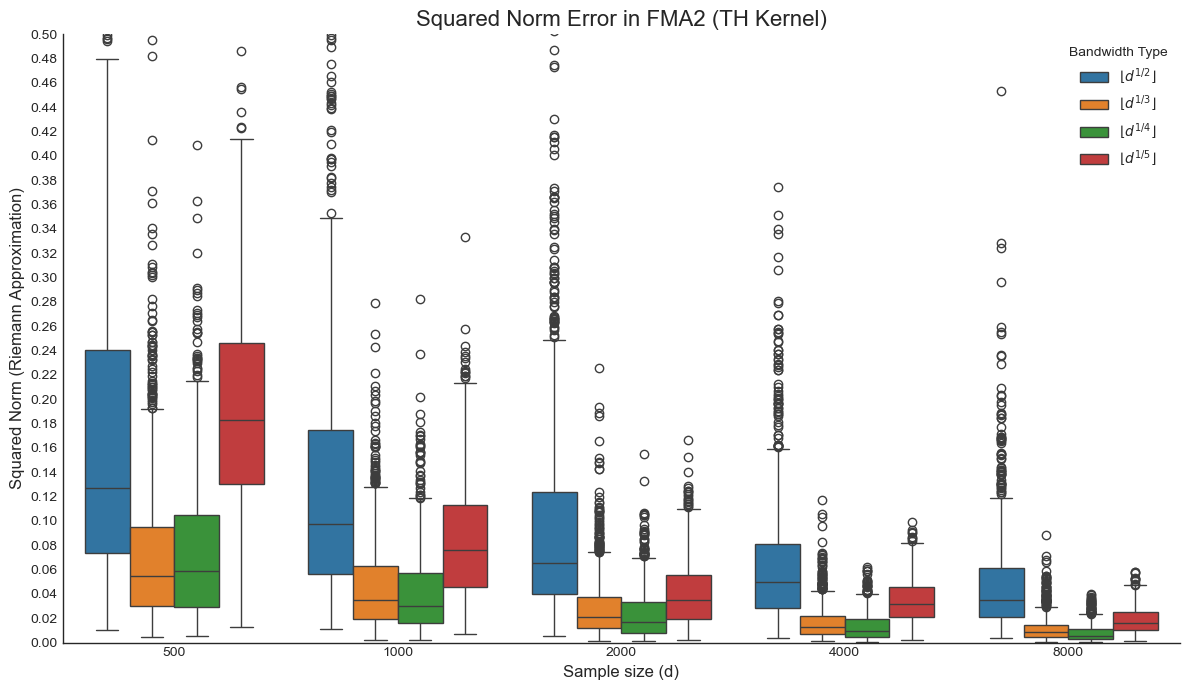

In [17]:
# FMA(2) TH kernel
# Parameters
model = "FMA2"
J = 5
num_components = 5
kern_type = "TH"
ds = [500, 1000, 2000, 4000, 8000]
band_types = [ "2","3", "4", "5"]
# Define the directory for results
current_dir = os.getcwd()
results_dir_param = os.path.join(current_dir, "results")
generate_model_plot(
        model=model,
        J=J,
        num_components=num_components,
        kern_type=kern_type,
        ds=ds,
        band_types=band_types,
        results_dir=results_dir_param
    )

## Quadratic Spectral

Searching for data files for model: FMA2...

Generating plot...

Plot successfully saved to /Users/xinyiwang/Desktop/Desktop - XINYI的MacBook Pro/UCDavis/research_alex/long-run-covariance/codes/results/FMA2_boxplot_J5_numcomp5_kernelQS.png


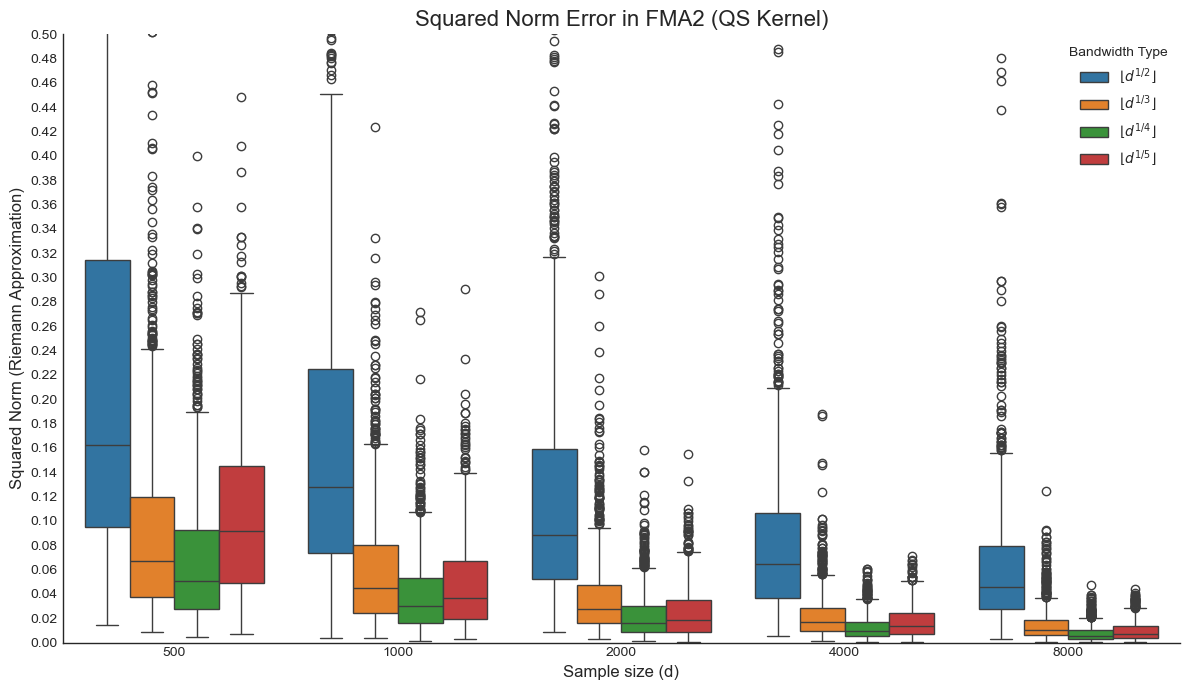

In [18]:
# FMA(2) QS kernel
# Parameters
model = "FMA2"
J = 5
num_components = 5
kern_type = "QS"
ds = [500, 1000, 2000, 4000, 8000]
band_types = [ "2","3", "4", "5"]
# Define the directory for results
current_dir = os.getcwd()
results_dir_param = os.path.join(current_dir, "results")
generate_model_plot(
        model=model,
        J=J,
        num_components=num_components,
        kern_type=kern_type,
        ds=ds,
        band_types=band_types,
        results_dir=results_dir_param
    )

# FAR (2)

## Barlett

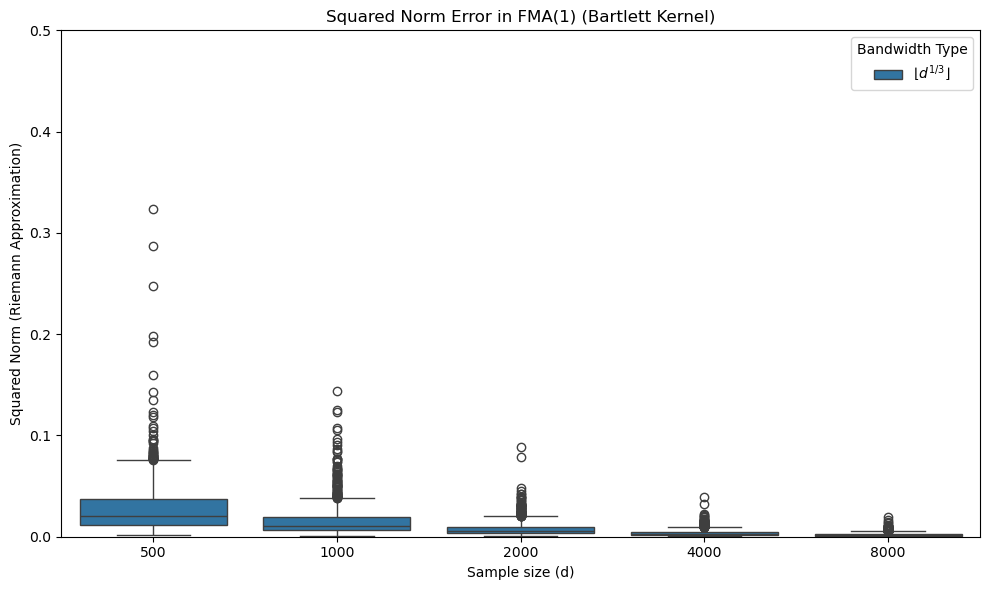

Plot saved to /Users/xinyiwang/Desktop/Desktop - XINYI的MacBook Pro/UCDavis/research_alex/long-run-covariance/codes/results/FAR2_boxplot_J5_numcomp5_kernelBartlett.png


In [3]:
# FAR(2)
# Parameters
J = 5
num_components = 5
model = "FAR2"
kern_type = "Bartlett"
ds = [500, 1000, 2000, 4000, 8000]
band_types = ["3"]

# Band type labels for legend
band_label_map = {
    "2": r"$\lfloor d^{1/2} \rfloor$",
    "3": r"$\lfloor d^{1/3} \rfloor$",
    "4": r"$\lfloor d^{1/4} \rfloor$",
    "5": r"$\lfloor d^{1/5} \rfloor$",
    "6": r"$\lfloor d^{1/6} \rfloor$",
    "7": r"$\lfloor d^{1/7} \rfloor$",
    "8": r"$\lfloor d^{1/8} \rfloor$",
    "fix_2": r"$2$",
}

# Directories
current_dir = os.getcwd()
results_dir = os.path.join(current_dir, "results")

# Collect all data
data = []
for d in ds:
    for band_type in band_types:
        filename = f"{model}_d{d}_J{J}_numcomp{num_components}_band{band_type}_kernel{kern_type}.csv"
        
        file_path = os.path.join(results_dir, filename)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df["d"] = d
            df["band_type"] = band_type
            df["band_label"] = band_label_map[band_type]  # ← mapped label for legend
            data.append(df)
        else:
            print(f"File not found: {file_path}")

# Combine data
full_df = pd.concat(data, ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="d",
    y="squared_norm",
    hue="band_label",  # use descriptive labels
    data=full_df,
    order=ds,
    hue_order=[band_label_map[b] for b in band_types]
)
plt.title("Squared Norm Error in FMA(1) (Bartlett Kernel)")
plt.xlabel("Sample size (d)")
plt.ylabel("Squared Norm (Riemann Approximation)")
plt.ylim(0, 0.5) 
plt.legend(title="Bandwidth Type")
plt.tight_layout()

# Save plot
plot_filename = f"{model}_boxplot_J{J}_numcomp{num_components}_kernel{kern_type}.png"
plot_path = os.path.join(results_dir, plot_filename)
plt.savefig(plot_path, dpi=300)
plt.show()
print(f"Plot saved to {plot_path}")
